<a href="https://colab.research.google.com/github/Someshwarms/hyperparameter-optimization-of-NN-using-kerastuner/blob/main/Handling_a_imbalanced_dataset_by_using_oversampling_and_training_it_with_N_N_using_kerastuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np 
#import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Class'].dtype

dtype('int64')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [ ]:
df.shape

(284807, 31)

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


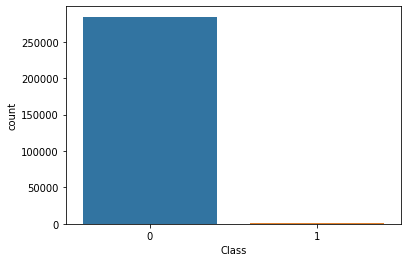

In [ ]:
sns.countplot('Class',data=df)
#Highly imbalanced dataset

In [5]:
X=df.drop('Class',axis=1)#independent feature
y=df['Class']#dependent feature

In [6]:
#To scale down the value we will use minmax scaler for this case
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [7]:
X_train.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117199,-0.009336,-0.422051,-0.105366,0.172454,-6.285982e-02,0.084191,-0.036579,-0.007505,0.029153,-0.247544,0.124407,-0.064943,-0.097503,-0.186211,0.011953,-0.071479,0.091134,2.945684e-02,-0.051531,0.046422,0.143787,0.051617,-0.017933,-0.234280,-0.040559,-0.005026,-0.011774,-0.011385
V1,0.117199,1.000000,0.008537,-0.005078,-0.000963,-0.008600,9.901982e-04,0.000351,0.004442,0.004413,0.004829,0.000373,-0.000273,0.002275,-0.000068,-0.000321,-0.001189,-0.000261,-0.001300,-8.413336e-04,-0.001174,-0.004624,-0.001288,-0.003338,0.000113,0.002682,0.000144,-0.006208,0.014435,-0.231364
V2,-0.009336,0.008537,1.000000,0.002038,-0.003689,-0.003827,3.134060e-03,0.002692,-0.003702,-0.002532,-0.002907,-0.001025,0.000683,-0.002153,0.000197,-0.000910,-0.001519,0.000801,-0.000048,-6.679750e-04,-0.005220,0.001182,-0.000132,-0.006370,-0.001426,-0.003138,-0.003256,-0.009671,0.013019,-0.530738
V3,-0.422051,-0.005078,0.002038,1.000000,0.000992,-0.002786,-2.683744e-03,-0.008248,0.005868,0.000754,0.002352,0.001221,0.000108,0.001347,0.000274,0.002109,-0.000695,-0.002050,-0.000331,-3.941715e-04,0.000709,-0.002816,-0.000141,-0.001470,0.000119,0.001214,-0.000785,-0.002637,0.011075,-0.213479
V4,-0.105366,-0.000963,-0.003689,0.000992,1.000000,0.000651,-2.377926e-03,0.001187,0.000322,0.004348,0.000903,-0.000327,0.002906,-0.000731,-0.000599,0.002068,-0.001781,-0.001592,0.001010,4.148890e-04,0.001952,-0.000278,0.000916,0.003012,0.000437,-0.000972,0.001158,0.002240,-0.004805,0.101305
V5,0.172454,-0.008600,-0.003827,-0.002786,0.000651,1.000000,-1.267382e-02,-0.022414,0.004797,0.003442,0.003943,0.000876,0.003564,-0.000003,0.002488,0.000497,-0.001248,-0.002112,0.001251,4.152978e-04,0.001204,0.000638,-0.000907,-0.003257,-0.001842,-0.001440,-0.001398,-0.005243,0.015705,-0.393951
V6,-0.062860,0.000990,0.003134,-0.002684,-0.002378,-0.012674,1.000000e+00,0.010051,-0.000424,0.000292,-0.003266,0.000739,-0.002252,0.000017,-0.001941,-0.000103,0.000974,0.000093,-0.001240,-1.375708e-07,-0.001318,0.002506,-0.000218,0.002596,0.001416,0.001291,-0.001411,0.006032,-0.010237,0.221738
V7,0.084191,0.000351,0.002692,-0.008248,0.001187,-0.022414,1.005134e-02,1.000000,0.006035,-0.002624,-0.004749,-0.001160,-0.003240,0.001677,-0.001583,-0.000830,0.001324,-0.002508,0.000570,1.276036e-03,-0.003009,-0.005209,0.002725,0.006792,-0.000774,0.003924,0.000351,0.014938,-0.022402,0.406604
V8,-0.036579,0.004442,-0.003702,0.005868,0.000322,0.004797,-4.242684e-04,0.006035,1.000000,0.000977,0.002332,0.001223,0.001622,0.001722,0.001733,0.001453,0.002081,0.000640,0.001190,-3.594573e-04,0.002482,-0.009375,0.006806,0.005141,0.000779,0.001605,0.000563,-0.000916,0.002814,-0.104669
V9,-0.007505,0.004413,-0.002532,0.000754,0.004348,0.003442,2.916323e-04,-0.002624,0.000977,1.000000,-0.005142,-0.000808,0.001642,-0.000342,-0.000081,-0.000097,0.002525,0.001401,0.000160,-1.006949e-03,-0.001678,0.001058,-0.001832,0.000184,0.001225,-0.003811,0.001655,0.001300,-0.004074,-0.043996


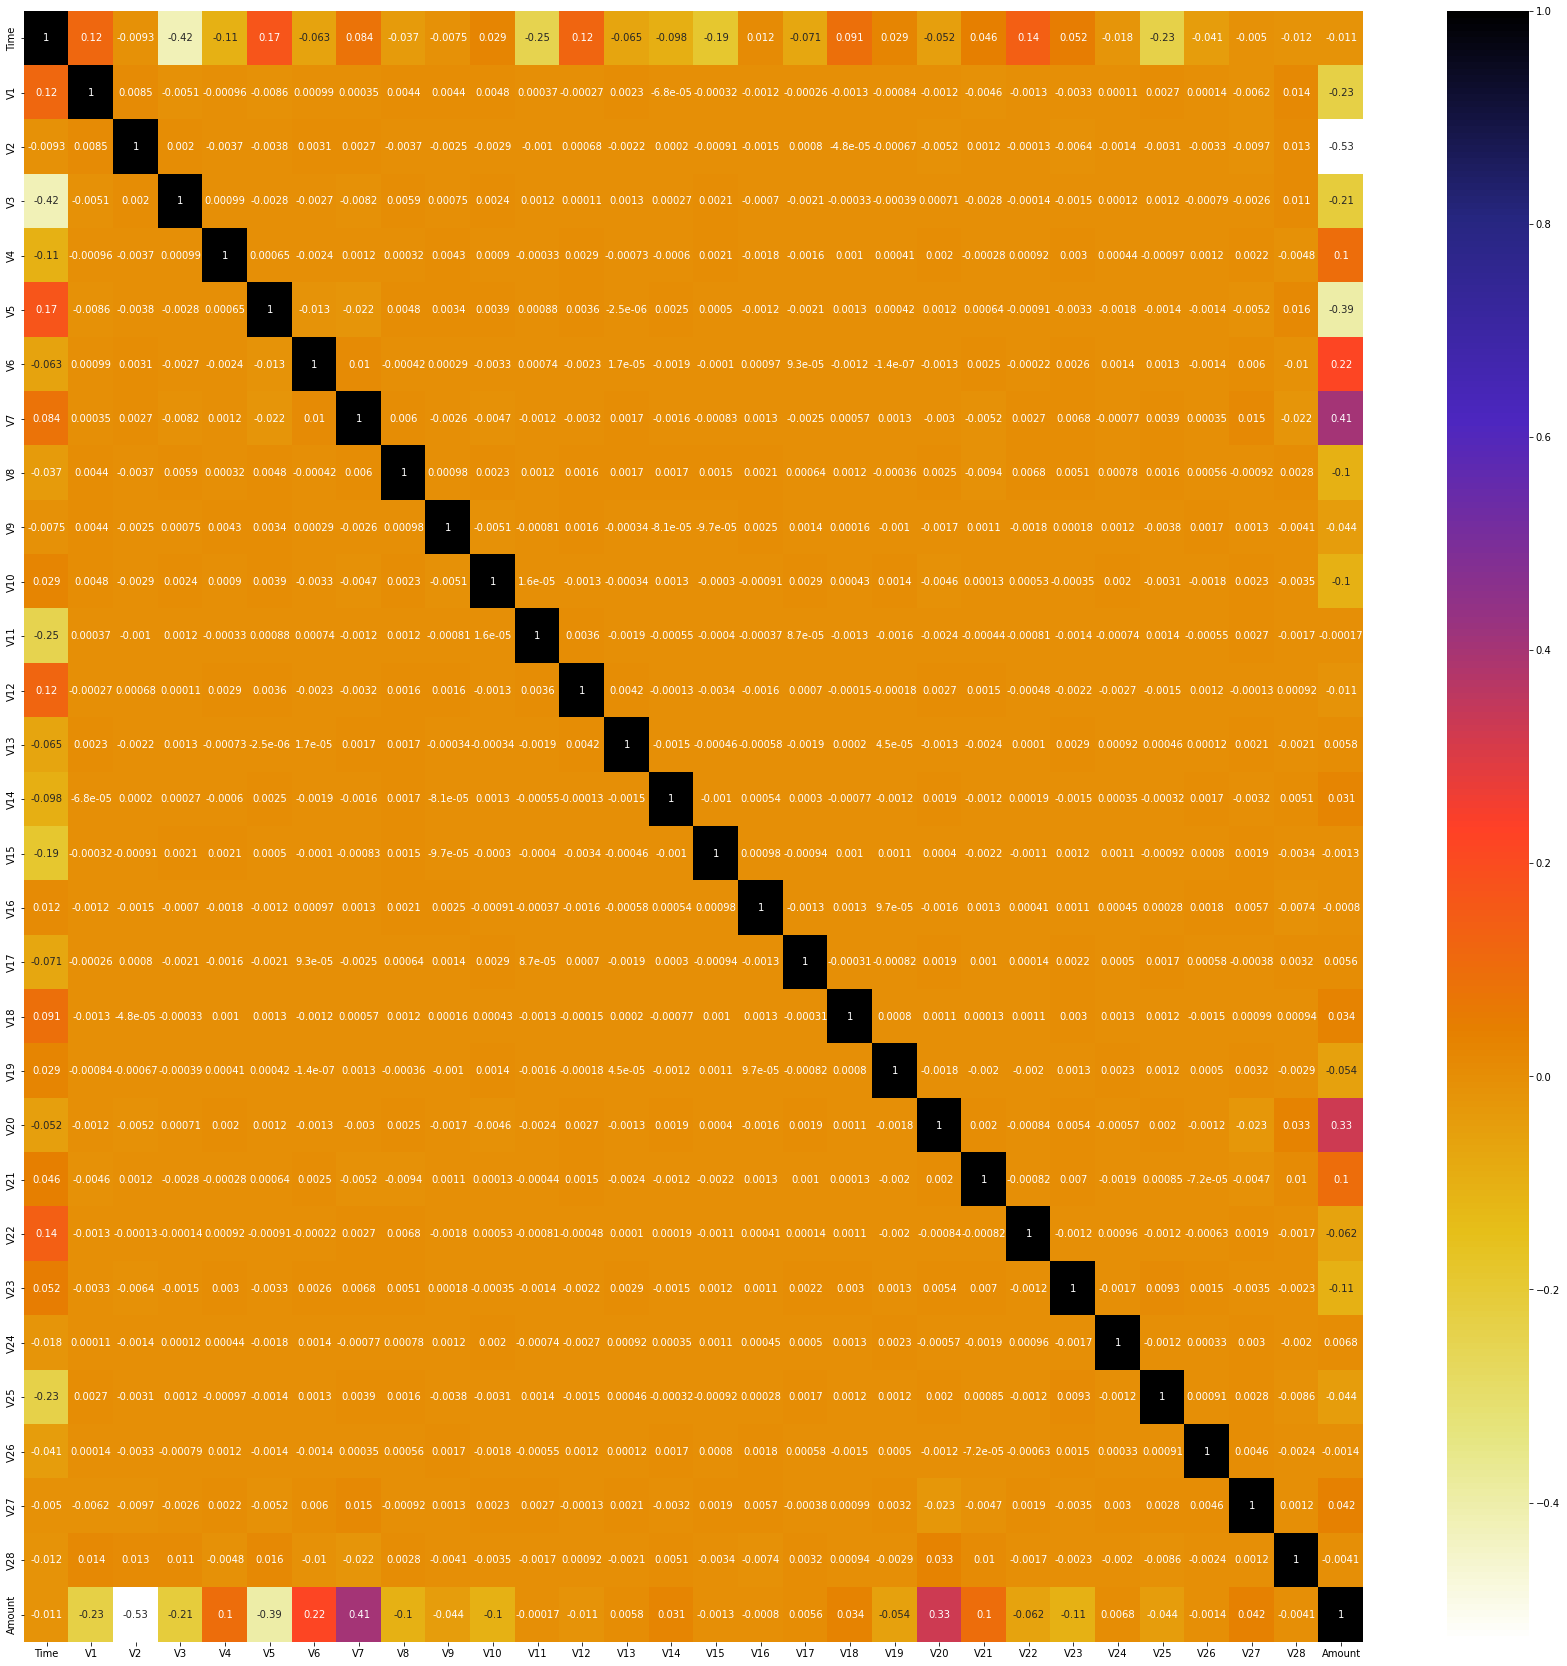

In [8]:
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [11]:
corr_features

set()

**As we can see there is no correlation present in the dataset.There is no need of feture selection for this case**

In [ ]:
#lets balanced the imbalanced dataset before scaling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 199024, 1: 340})
The number of classes after fit Counter({0: 199024, 1: 149268})


In [ ]:
#lets scale down the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train_os)

In [ ]:
X_train_scaled

array([[8.70332430e-01, 9.47728333e-01, 7.78845842e-01, ...,
        4.18866902e-01, 3.16018666e-01, 7.70693110e-05],
       [3.05866148e-01, 9.39396504e-01, 7.59196637e-01, ...,
        4.23512060e-01, 3.17928446e-01, 4.80710096e-03],
       [3.07376670e-01, 9.80094444e-01, 7.52270736e-01, ...,
        4.17414629e-01, 3.13615934e-01, 3.07498766e-03],
       ...,
       [3.19923837e-01, 8.60542955e-01, 7.73353005e-01, ...,
        4.44299341e-01, 3.20419064e-01, 3.89238944e-05],
       [9.31025303e-01, 9.47348297e-01, 8.20040577e-01, ...,
        4.28766314e-01, 3.17021492e-01, 2.99713987e-05],
       [2.93457879e-01, 8.14537509e-01, 8.39706906e-01, ...,
        4.38106972e-01, 3.17777086e-01, 3.89200021e-03]])

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[3.36464338e-01, 9.76351930e-01, 7.55370109e-01, ...,
        4.16803424e-01, 3.13788821e-01, 5.56339223e-03],
       [3.65742991e-01, 9.83752327e-01, 7.54929376e-01, ...,
        4.17729098e-01, 3.13468828e-01, 8.01832226e-04],
       [3.83973424e-01, 9.32933399e-01, 7.90835114e-01, ...,
        4.25705992e-01, 3.14420210e-01, 1.19107117e-04],
       ...,
       [3.96011297e-01, 9.75188888e-01, 7.55470642e-01, ...,
        4.14811651e-01, 3.13665282e-01, 7.20014199e-03],
       [8.05889298e-01, 8.60828739e-01, 7.81564216e-01, ...,
        4.15419730e-01, 2.96139960e-01, 3.15945251e-03],
       [2.90784082e-01, 9.36492400e-01, 7.86002086e-01, ...,
        4.11256653e-01, 3.10068664e-01, 1.74768286e-04]])

In [ ]:
!pip install keras-tuner

In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
  model=tf.keras.Sequential()
  for i in range(hp.Int('num_layers',2,50)):
    model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=32,max_value=1000,step=32),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=5,
    directory='project',
    project_name='creditcard_fraud')

INFO:tensorflow:Reloading Oracle from existing project project/creditcard_fraud/oracle.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 50, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1000, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
X_train_scaled.shape

(348292, 30)

In [ ]:
X_test_scaled.shape

(85443, 30)

In [ ]:
y_train_os.shape

(348292,)

In [ ]:
y_test.shape

(85443,)

In [ ]:
y_train=np.asarray(y_train_os).astype('int64').reshape((-1,1))
y_test=np.asarray(y_test).astype('int64').reshape((-1,1))

In [ ]:
y_train.shape

(348292, 1)

In [ ]:
y_test.shape

(85443, 1)

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

Trial 6 Complete [00h 20m 12s]
val_accuracy: 0.9925049424171448

Best val_accuracy So Far: 0.9925049424171448
Total elapsed time: 01h 44m 01s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/creditcard_fraud
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 512
learning_rate: 0.01
Score: 0.9925049424171448
Trial summary
Hyperparameters:
num_layers: 36
units_0: 96
learning_rate: 0.001
Score: 0.9916295170783996
Trial summary
Hyperparameters:
num_layers: 31
units_0: 928
learning_rate: 0.01
Score: 0.9913041353225708
Trial summary
Hyperparameters:
num_layers: 15
units_0: 96
learning_rate: 0.01
Score: 0.9912315726280212
Trial summary
Hyperparameters:
num_layers: 39
units_0: 704
learning_rate: 0.01
Score: 0.9910841226577759


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
y_train.shape

(348292, 1)

In [ ]:
history=best_model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0922 - accuracy: 0.9683 - val_loss: 0.1606 - val_accuracy: 0.9372
Epoch 2/20
8708/8708 [==============================] - 35s 4ms/step - loss: 0.0896 - accuracy: 0.9693 - val_loss: 0.2516 - val_accuracy: 0.9015
Epoch 3/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0879 - accuracy: 0.9696 - val_loss: 0.1693 - val_accuracy: 0.9343
Epoch 4/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0861 - accuracy: 0.9699 - val_loss: 0.1448 - val_accuracy: 0.9460
Epoch 5/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0838 - accuracy: 0.9708 - val_loss: 0.1103 - val_accuracy: 0.9516
Epoch 6/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0823 - accuracy: 0.9711 - val_loss: 0.1976 - val_accuracy: 0.9191
Epoch 7/20
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0807 - accuracy: 0.9713 - val_loss: 0.2598 - val_ac

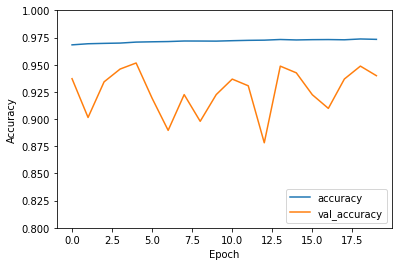

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

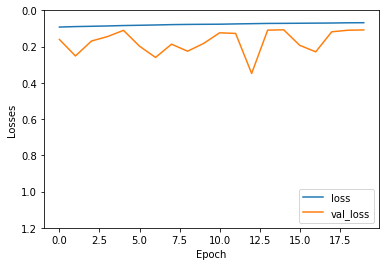

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.ylim([1.2, 0])
plt.legend(loc='lower right')

#Doing Same thing but using Machine Learning algorithm


In [ ]:
loss,acc=best_model.evaluate(X_test_scaled,y_test,verbose=2)
print("Accuracy:",acc*100)
print("Loss:",loss*100)

2671/2671 - 5s - loss: 0.0485 - accuracy: 0.9894 - 5s/epoch - 2ms/step
Accuracy: 98.94315600395203
Loss: 4.847674071788788


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
X=df.drop('Class',axis=1)#independent feature
y=df['Class']#dependent feature

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,train_size=0.7)

In [ ]:
os=RandomOverSampler(0.75)
X_train_os1,y_train_os1=os.fit_resample(X_train1,y_train1)
print("The number of classes before fit {}".format(Counter(y_train1)))
print("The number of classes after fit {}".format(Counter(y_train_os1)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 199006, 1: 358})
The number of classes after fit Counter({0: 199006, 1: 149254})


In [ ]:
rf_clf1=RandomForestClassifier()
rf_clf1.fit(X_train_os1,y_train_os1)

RandomForestClassifier()

In [ ]:
y_pred1=rf_clf1.predict(X_test1)
print("Accuracy Score:",accuracy_score(y_test1,y_pred1))
print("\n")
print("Confusion Matrix:\n",confusion_matrix(y_test1,y_pred1))
print("\n")
print("Classification Report:\n",classification_report(y_test1,y_pred1))

Accuracy Score: 0.9995903701883126


Confusion Matrix:
 [[85304     5]
 [   30   104]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.95      0.78      0.86       134

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#Conculsion:#

**The conclusion is Neural network with hyperparameter tuning as well as Randomforest both techniques gaved a good result.For both the method you have to perform oversampling to slove the problem of imbalanced dataset but in case of neural network you have touse scaling method to scale down the dataset values.**
